In [1]:
!pip install bs4
!pip install html5lib

You should consider upgrading via the '/home/vaslem/code/.venv/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/vaslem/code/.venv/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

/home/vaslem/code/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/vaslem/code/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


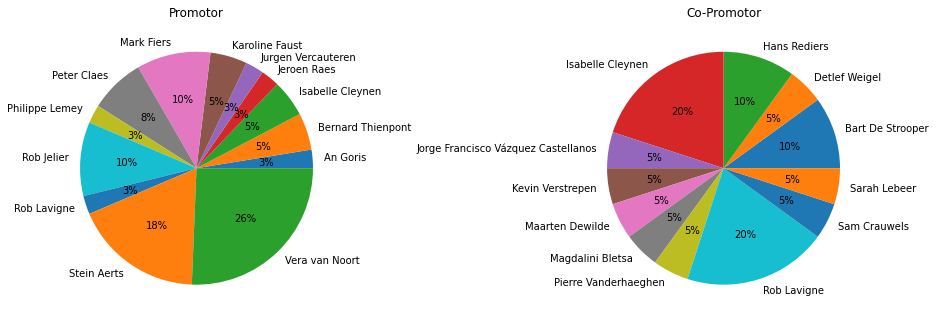

In [3]:

r = requests.get('https://icts.kuleuven.be/masterproeven/student/clusters/69').text
soup = BeautifulSoup(r, 'lxml')
subject_cards = soup.find_all('tr', {"class":  lambda x: x 
                       and "subject-card" in x.split() })
subjects = []
attrs = ['Promotor', 'Co-promotor']
for card in subject_cards:
    struct = {}
    struct['title'] = card.find('h6', {'class':'title uppercase'})['title']
    for elem in card.findAll('td', {'class':'element'}):
        for attr in attrs:
            if elem.find('i',{'title':attr}):
                struct[attr] = elem.find('div',{'class':'element-text'}).contents[0].strip()
    subjects.append(struct)
subjects_df = pd.DataFrame(subjects)
label_function='%1.0f%%'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 26))
subjects_df.groupby('Promotor').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax1 )
subjects_df.groupby('Co-promotor').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax2)
ax1.set_ylabel('', size=22)
ax2.set_ylabel('', size=22)
ax1.set_title('Promotor')
ax2.set_title('Co-Promotor')
plt.tight_layout()

In [6]:
subjects_df

,title,Promotor,Co-promotor
0,ARA-peps database 2.0,Vera van Noort,NaN
1,Batch analysis of microbial community flow cyt...,Karoline Faust,NaN
2,Cell shape dynamics in the C. elegans embryo,Rob Jelier,NaN
3,Cell type models in the context of single-cell...,Stein Aerts,NaN
4,Comparative genome analysis of Agrobacterium s...,Vera van Noort,Hans Rediers
5,Construction of gene regulatory networks using...,Stein Aerts,NaN
6,Deciphering the gene regulatory network contro...,Stein Aerts,Pierre Vanderhaeghen
7,Deciphering the genomic regulatory code with d...,Stein Aerts,NaN
8,Deciphering the RNA virome composition from ro...,Philippe Lemey,Magdalini Bletsa
9,Detection of novel bacterial mobile genetic el...,Vera van Noort,Sarah Lebeer
